# Final Project EDA

##### EDA is highly infulenced by : https://www.kaggle.com/bertcarremans/data-preparation-exploration which is a great way to handle data and analyze it.



In [6]:
# load the datasets
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
# print(train.head())
print('Training dataset dimensions before droping duplicates:',train.shape)
train.drop_duplicates()
print('Training dataset dimensions after droping duplicates:',train.shape)

# print(test.head())
print('Training dataset dimensions before droping duplicates:',test.shape)
test.drop_duplicates()
print('Training dataset dimensions after droping duplicates:',test.shape)

Training dataset dimensions before droping duplicates: (595212, 59)
Training dataset dimensions after droping duplicates: (595212, 59)
Training dataset dimensions before droping duplicates: (892816, 58)
Training dataset dimensions after droping duplicates: (892816, 58)


In [8]:
#identify missing values
missing_values = []

for column in train.columns:
    missings = train[train[column] == -1][column].count()
    if missings > 0:
        missing_values.append(column)
        missings_perc = missings/train.shape[0]
        
        print('Variable',column, 'has', missings, 'records with missing values')
        
print('In total, there are',len(missing_values),'variables with missing values')

Variable ps_ind_02_cat has 216 records with missing values
Variable ps_ind_04_cat has 83 records with missing values
Variable ps_ind_05_cat has 5809 records with missing values
Variable ps_reg_03 has 107772 records with missing values
Variable ps_car_01_cat has 107 records with missing values
Variable ps_car_02_cat has 5 records with missing values
Variable ps_car_03_cat has 411231 records with missing values
Variable ps_car_05_cat has 266551 records with missing values
Variable ps_car_07_cat has 11489 records with missing values
Variable ps_car_09_cat has 569 records with missing values
Variable ps_car_11 has 5 records with missing values
Variable ps_car_12 has 1 records with missing values
Variable ps_car_14 has 42620 records with missing values
In total, there are 13 variables with missing values


In [9]:
# droping columns
col_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(col_to_drop, inplace=True, axis=1)

print('train shape after droping columns',train.shape)

train shape after droping columns (595212, 57)


In [10]:
# Replacing missing values with mean and mode of respective columns
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

print("Missing values replaced with mean and median in respective columns analysis is in the report")

Missing values replaced with mean and median in respective columns analysis is in the report


In [12]:
# Handling Imbalnaced classes

desired_ratio=0.20

# Get the indices per target value
class_0 = train[train.target == 0].index
class_1 = train[train.target == 1].index

# Get original number of records per target value
number_of_samples_0 = len(train.loc[class_0])
print('Number of samples with target 0',number_of_samples_0)

number_of_samples_1 = len(train.loc[class_1])
print('Number of samples with target 1',number_of_samples_1)


# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_ratio)*number_of_samples_1)/(number_of_samples_0*desired_ratio)
print('undersampling_rate',undersampling_rate)
undersampled_count_0 = int(undersampling_rate*number_of_samples_0)
print('number of rows selected',undersampled_count_0)

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_count_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(class_0, random_state=37, n_samples=undersampled_count_0)

# Construct list with remaining indices
index_list = list(undersampled_idx) + list(class_1)

# Dropping all the remaining values apart from selected samples in training dataset
train1 = train.loc[index_list].reset_index(drop=True)

print('shape of train dataset after sampling', train.shape)
print(np.mean(train1['target']))

Number of samples with target 0 573518
Number of samples with target 1 21694
undersampling_rate 0.15130475416639058
number of rows selected 86776
Rate to undersample records with target=0: 0.15130475416639058
Number of records with target=0 after undersampling: 86776
shape of train dataset after sampling (595212, 57)
0.2


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 57 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [15]:
# create metadata to group different type of variables and datatypes

metadata = []
for column_name in train.columns:
    # classifying column names
    if column_name == 'target':
        role = 'target'
    elif column_name == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # classifying column levels
    if 'bin' in column_name or column_name == 'target':
        level = 'binary'
    elif 'cat' in column_name or column_name == 'id':
        level = 'nominal'
    elif train[column_name].dtype == float:
        level = 'interval'
    else: 
        level = 'ordinal'
        
    # ID Column is not required for analysis and modeling so discarding it
    required = True
    if column_name == 'id':
        required = False
    
    # Defining the data type 
    datatype = train[column_name].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    column_name_dict = {
        'varname': column_name,
        'role': role,
        'level': level,
        'required': required,
        'datatype': datatype
    }
    metadata.append(column_name_dict)
    
metadata = pd.DataFrame(metadata, columns=['varname', 'role', 'level', 'required', 'datatype'])
metadata.set_index('varname', inplace=True)

In [16]:
metadata

,role,level,required,datatype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [17]:
pd.DataFrame({'count' : metadata.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,11
3,input,nominal,12
4,input,ordinal,15
5,target,binary,1


In [18]:
# Index list based on data type
floattypes = metadata[(metadata.level == 'interval')& (metadata.required)].index
normalint = metadata[(metadata.level == 'ordinal') & (metadata.required)].index
binarytype = metadata[(metadata.level == 'binary') & (metadata.required)].index

In [19]:
train[floattypes].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.894047,2.346105,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.312581,0.832493,0.058300,0.224588,0.043947,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.666615,2.000000,0.316228,0.670867,0.353553,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.894047,3.000000,0.374166,0.765811,0.374691,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,3.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [20]:
train[normalint].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [21]:
train[binarytype].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
category_data = metadata[(metadata.level == 'nominal') & (metadata.required)].index

for category in category_data:
    distinct_values = train[category].value_counts().shape[0]
    print('Variable',category,'has',distinct_values,'distinct values')

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


Text(0,0.5,'Frquency')

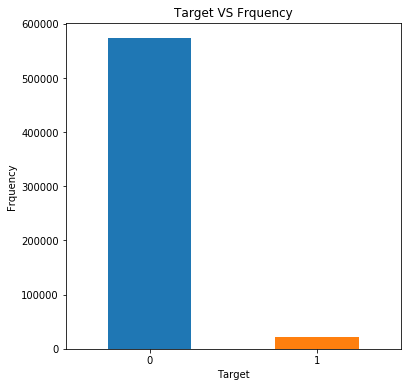

In [23]:

fig, ax = plt.subplots()
train['target'].value_counts().plot(ax=ax, kind='bar',figsize=(6,6),title='Target VS Frquency')
plt.xticks(rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Frquency')


In [24]:
category_data

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [25]:
class1train = train.loc[train['target'] == 1]
# class1train.head()
print(len(class1train))

21694


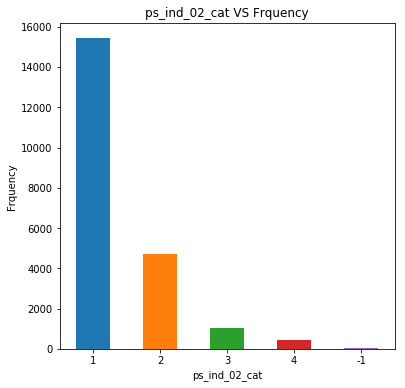

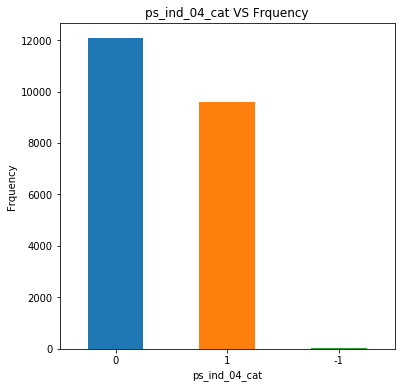

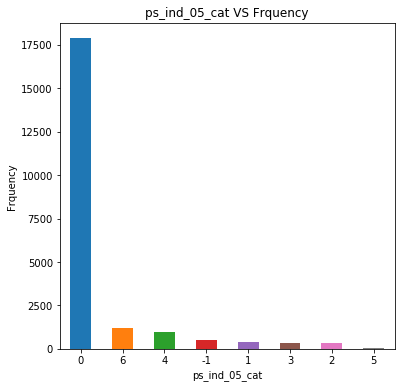

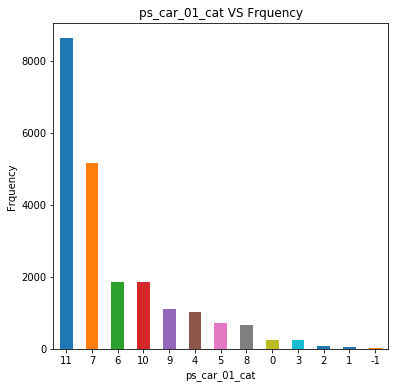

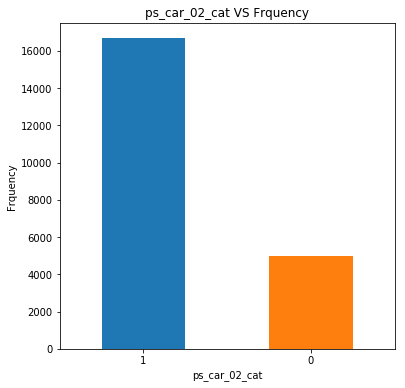

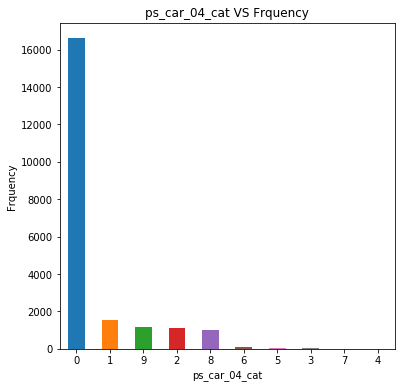

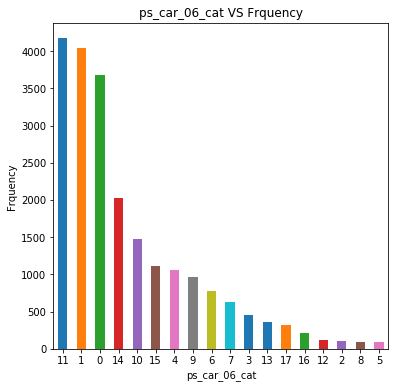

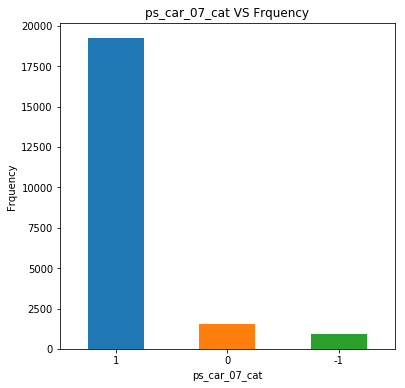

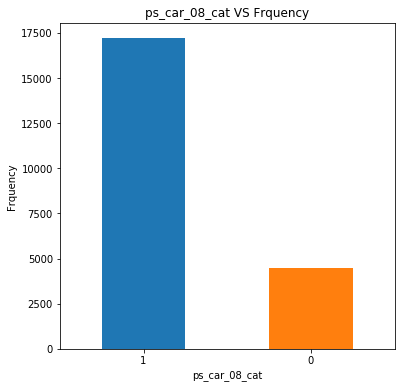

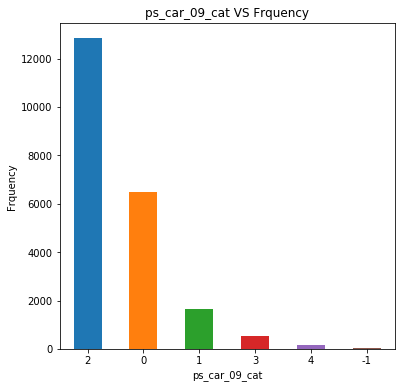

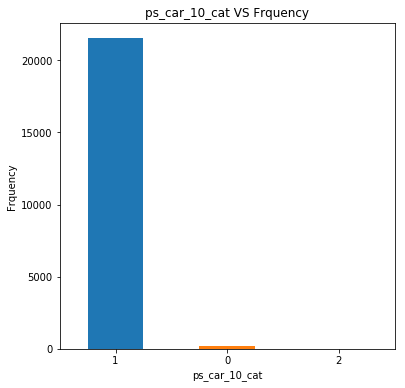

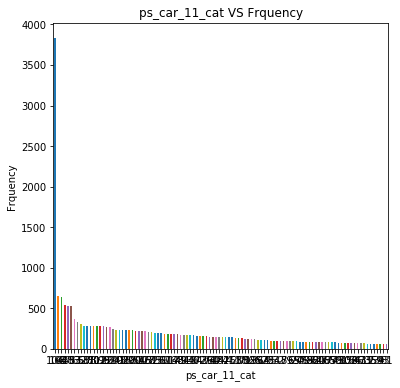

In [27]:
for feature in category_data:
    
    fig, ax = plt.subplots()
    class1train[feature].value_counts().plot(ax=ax, kind='bar',figsize=(6,6),title=  feature+' VS Frquency')
    plt.xticks(rotation='horizontal')
    plt.xlabel(feature)
    plt.ylabel('Frquency')
    

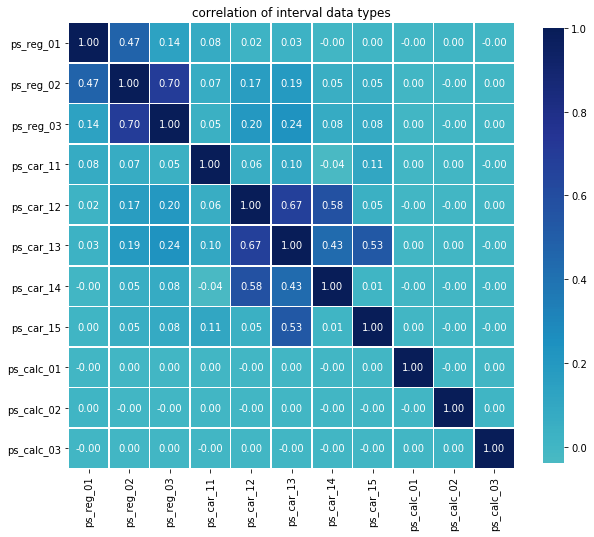

In [28]:
# for features with interavals correlation plot


correlations = train[floattypes].corr()


cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, cmap='YlGnBu', vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .80})
plt.title("correlation of interval data types")
plt.show();

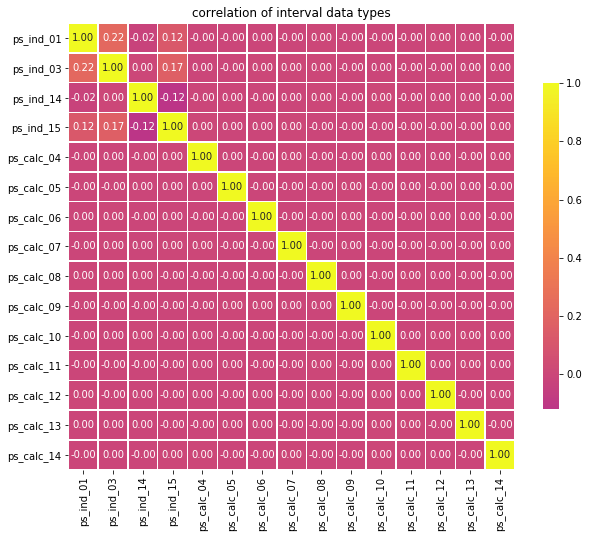

In [29]:
# for features with integer types correlation plot


correlations = train[normalint].corr()


cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, cmap='plasma', vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .60})
plt.title("correlation of interval data types")
plt.show();
    

In [30]:
# Binary features inspection

binarytrain = train[binarytype].copy()
binarytrain1 = binarytrain.loc[binarytrain['target'] == 1]


zero_values = []
one_values = []
for col in binarytype:
    zero_values.append((binarytrain1[col]==0).sum())
    one_values.append((binarytrain1[col]==1).sum())

zero_df = pd.DataFrame(zero_values)
one_df = pd.DataFrame(one_values)

binary_df = pd.concat([zero_df,one_df], axis=1, sort=False)
binary_df.columns = ['zero_values', 'one_values']

binary_df.set_index(binarytype)

,zero_values,one_values
varname,,
target,0,21694
ps_ind_06_bin,15006,6688
ps_ind_07_bin,14450,7244
ps_ind_08_bin,17595,4099
ps_ind_09_bin,18031,3663
ps_ind_10_bin,21682,12
ps_ind_11_bin,21648,46
ps_ind_12_bin,21405,289
ps_ind_13_bin,21665,29


In [31]:
binary_df.head()

,zero_values,one_values
0,0,21694
1,15006,6688
2,14450,7244
3,17595,4099
4,18031,3663


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

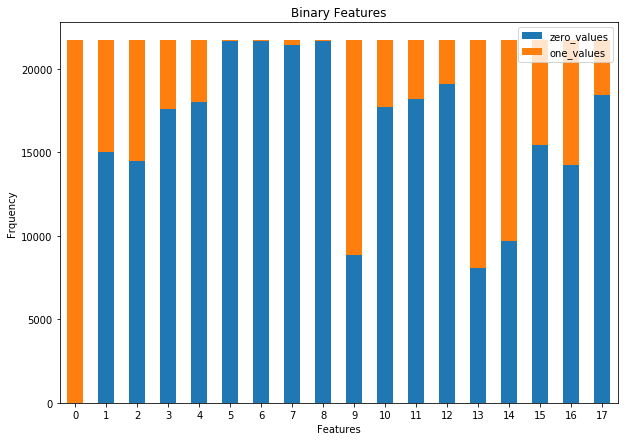

In [32]:
fig, ax = plt.subplots()
binary_df.plot.bar(ax=ax,stacked=True, figsize=(10,7),title='Binary Features')
plt.xlabel('Features')
plt.ylabel('Frquency')
plt.xticks(rotation='horizontal')

In [33]:
ticks = binarytype.tolist()
ticks1 = pd.DataFrame(ticks)
ticks1.columns = ['Feature']
ticks1

,Feature
0,target
1,ps_ind_06_bin
2,ps_ind_07_bin
3,ps_ind_08_bin
4,ps_ind_09_bin
5,ps_ind_10_bin
6,ps_ind_11_bin
7,ps_ind_12_bin
8,ps_ind_13_bin
9,ps_ind_16_bin
